In [17]:
import matplotlib.pyplot as plt
from scipy import ndimage
import imageio

import torch
import torch.nn.functional as F
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
from tqdm import tqdm
import json
import numpy as np
import faiss  
import os
import pickle

/home/nrdyava/miniconda3/envs/coir-clip2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def plot_function(query_img_num, target_img_num, modification):
    image1 = imageio.v2.imread('datasets/LaSCo/coco/val2014/COCO_val2014_'+f"{query_img_num:012d}"+".jpg")
    image2 = imageio.v2.imread('datasets/LaSCo/coco/val2014/COCO_val2014_'+f"{target_img_num:012d}"+".jpg")

    print("Modiifcation = {}\n".format(modification))

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image1)
    axs[1].imshow(image2)
    axs[0].set_title('Query Image')
    axs[1].set_title('Target Image')
    plt.axis('off')
    plt.show()

## Examples from the dataset

Modiifcation = The tiles should not be lined up to create a continuous pattern



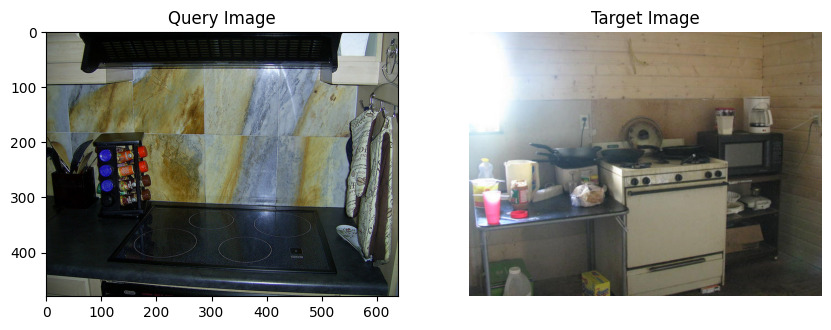

In [16]:
plot_function(35326, 53697, "The tiles should not be lined up to create a continuous pattern")

## Plotting retreived Exapmples

In [25]:
def plot_function_retrieved_exmps(query_img_num, target_img_num, top_1_ret_img_num, modification):
    image1 = imageio.v2.imread('datasets/LaSCo/coco/val2014/COCO_val2014_'+f"{query_img_num:012d}"+".jpg")
    image2 = imageio.v2.imread('datasets/LaSCo/coco/val2014/COCO_val2014_'+f"{target_img_num:012d}"+".jpg")
    image3 = imageio.v2.imread('datasets/LaSCo/coco/val2014/COCO_val2014_'+f"{top_1_ret_img_num:012d}"+".jpg")

    print("Modiifcation = {}\n".format(modification))

    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    axs[0].imshow(image1)
    axs[1].imshow(image2)
    axs[2].imshow(image3)
    axs[0].set_title('Query Image')
    axs[1].set_title('Target Image')
    axs[2].set_title('Top-1 Retrieved')
    plt.axis('off')
    plt.show()

In [18]:
with open('datasets/LaSCo/lasco_val.json', 'r') as file:
    lasco_val = json.load(file)

In [19]:
with open('lasco_val_retrieved_candidates.pkl', 'rb') as file:
    lasco_val_evaluation_results = pickle.load(file)

Modiifcation = This food is not acidic



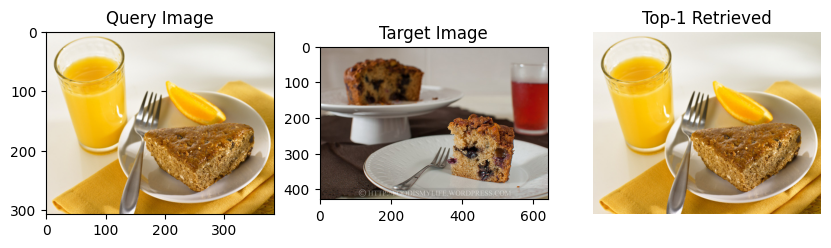

Modiifcation = There should not be a graffiti on the wall



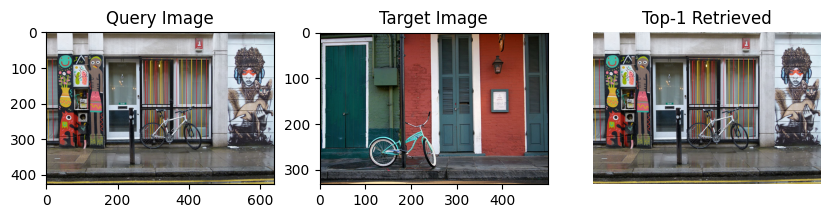

Modiifcation = The boats are not docked



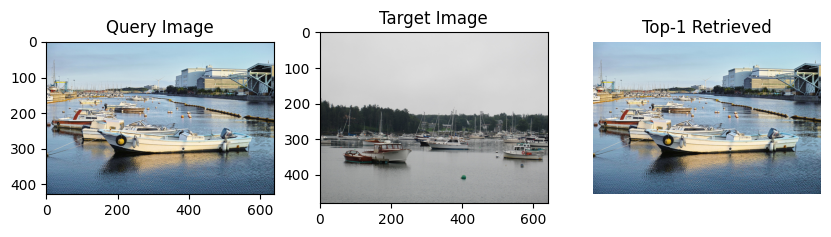

Modiifcation = Can you please add some butter to the mug?



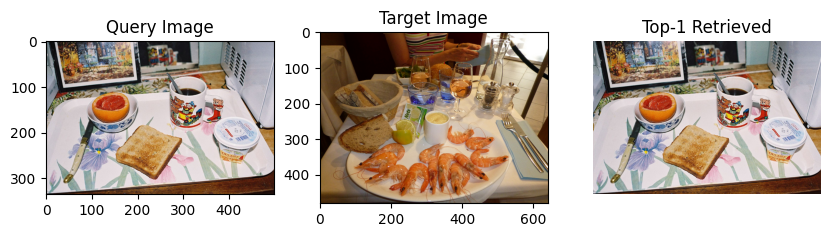

Modiifcation = This is an unhealthy meal.



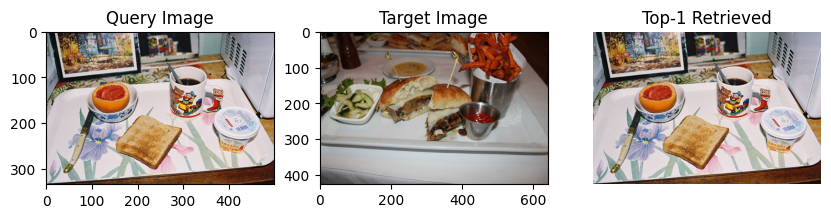

Modiifcation = A cow is in the photo



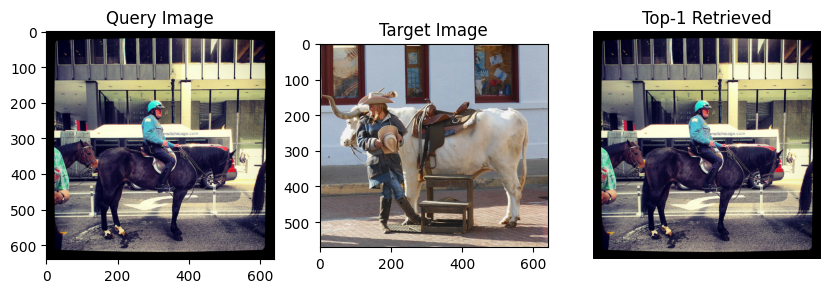

Modiifcation = The woman has an umbrella in her hand



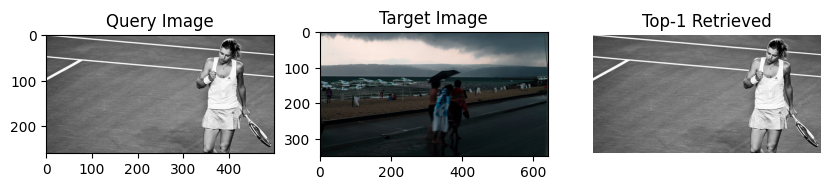

Modiifcation = The woman should play frisbee



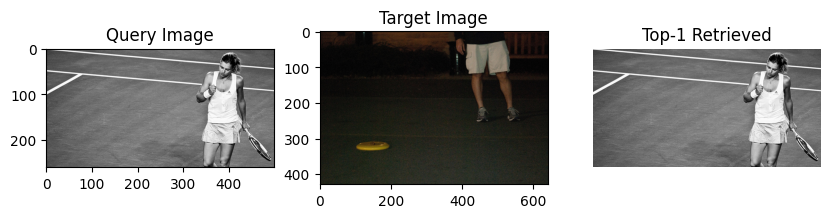

Modiifcation = The skiers shoes are white



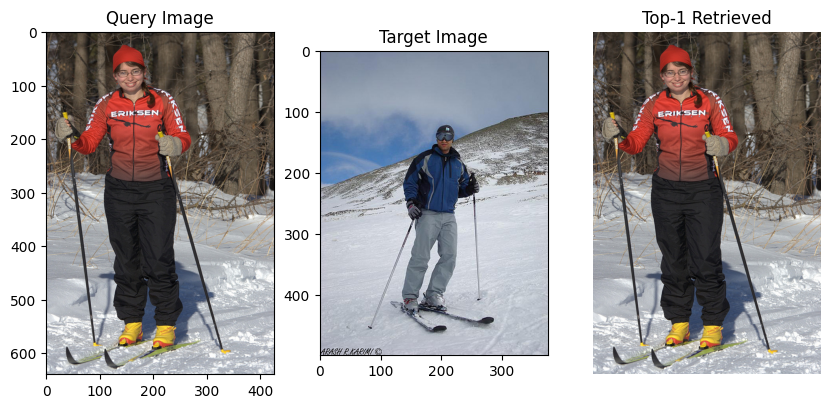

Modiifcation = The person is riding the bike



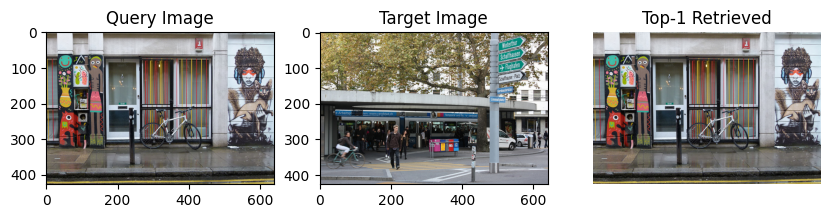

Modiifcation = The utensil is called a spoon



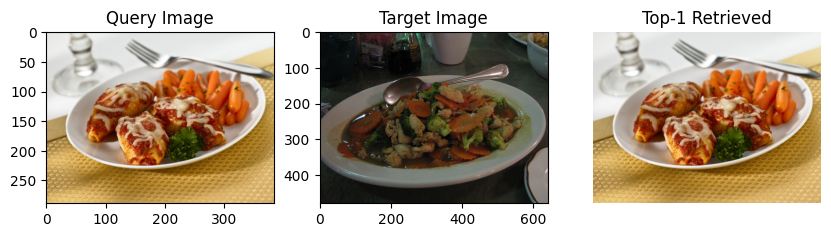

Modiifcation = Change the type of meal to breakfast



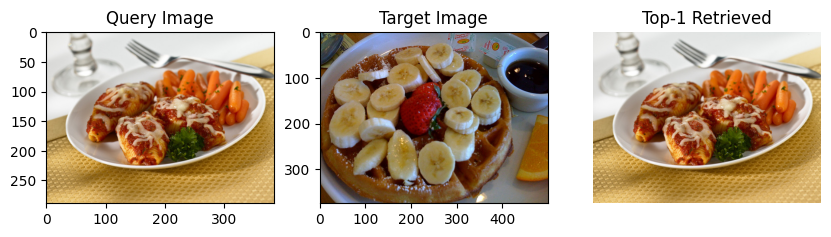

Modiifcation = The color of the plate is green



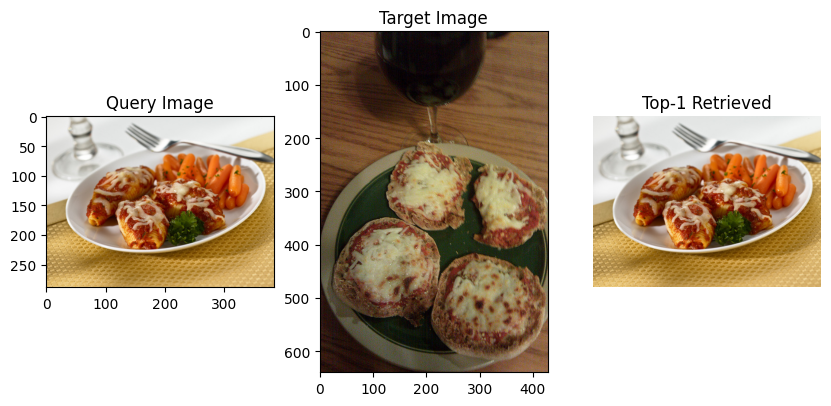

Modiifcation = He is holding the ski poles



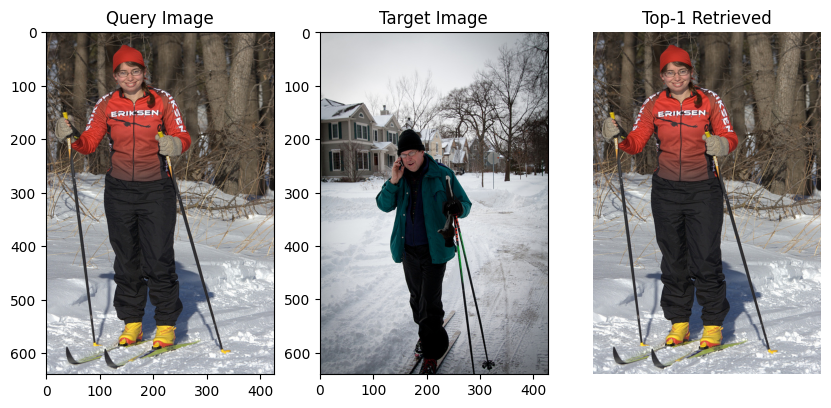

Modiifcation = A black bag



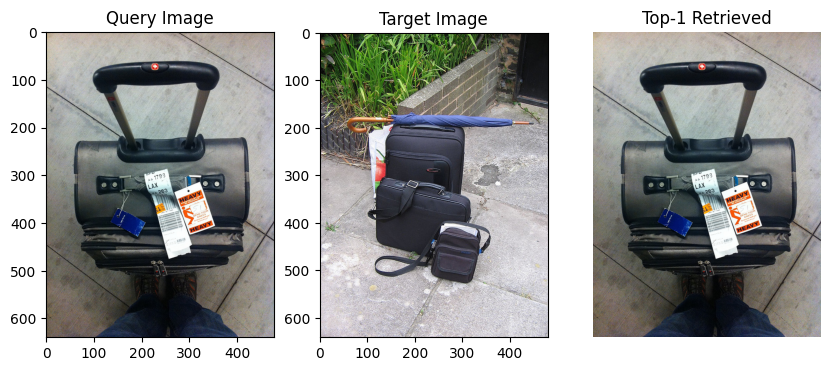

Modiifcation = Remove all tags from the suitcase



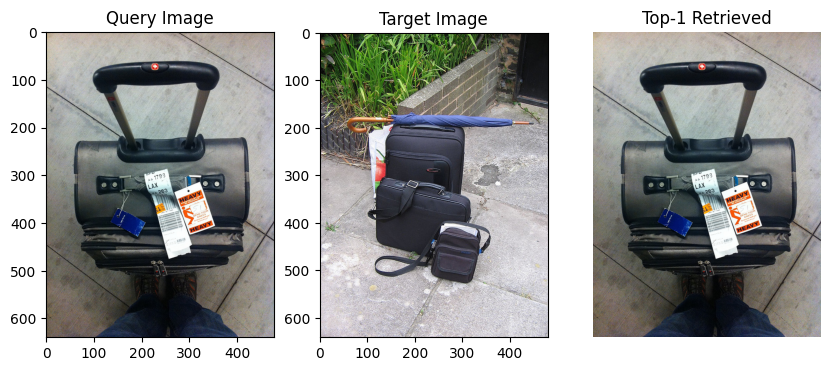

Modiifcation = What type of vehicle are they traveling in?



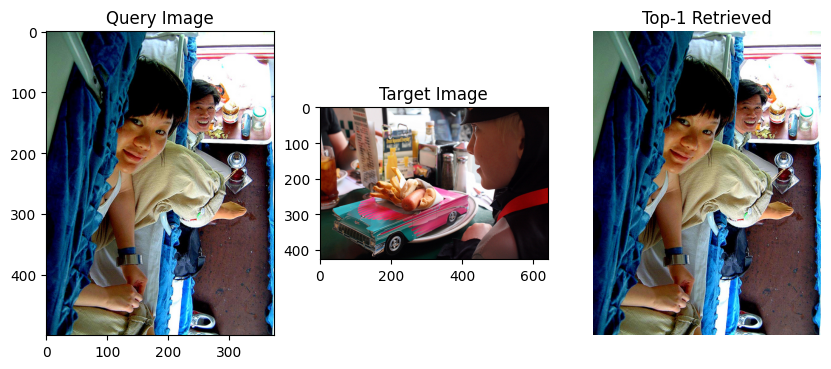

Modiifcation = The people in the picture should not look happy



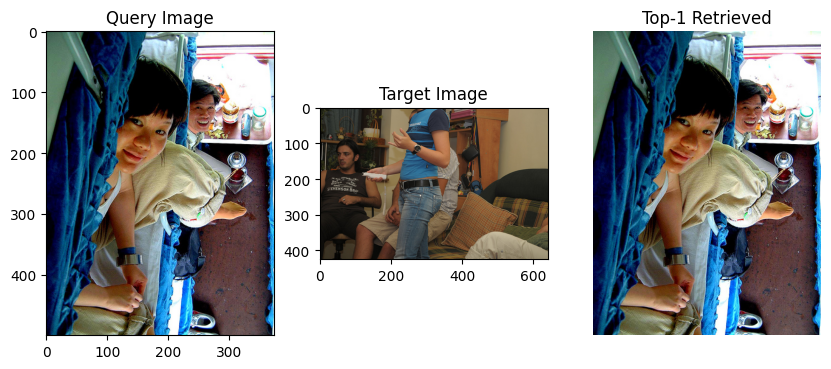

Modiifcation = The sun is lighting up the street



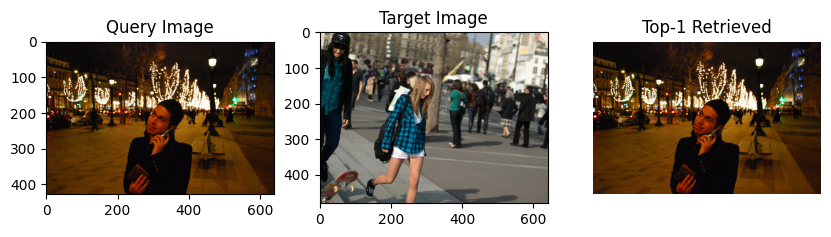

In [26]:
cntr = 1
for i in range(20):
    plot_function_retrieved_exmps(lasco_val[i]['query-image'][0], lasco_val[i]['target-image'][0], lasco_val_evaluation_results[i]['top_50_retrieved'][0], lasco_val[i]['query-text'])
    cntr+=1
    if cntr == 20:
        break